# Modelos de Regresión Lineal

## Modelo con datos simulados

* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 12 + 2.6 * x + e$
* e estará distribuida según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 12 + 2.6 * x

In [5]:
y_act = 12 + 2.6 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        'x' : x_list,
        'y_act' : y_act_list,
        'y_pred' : y_pred_list
    }
)

In [8]:
data.head()

,x,y_act,y_pred
0,3.949480,21.852077,22.268649
1,0.788902,14.335707,14.051145
2,4.760155,24.802369,24.376402
3,2.751641,19.865822,19.154265
4,9.085231,35.830204,35.621599


In [9]:
y_mean = [np.mean(data['y_act']) for i in range(1, len(x_list) + 1)]

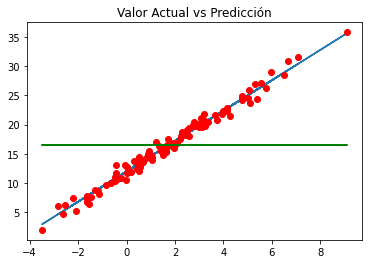

In [10]:
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'],data['y_act'], 'ro')
plt.plot(data['x'], y_mean, 'g') # promedio de todas las y
plt.title('Valor Actual vs Predicción')
plt.show()

### ¿Cómo es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos respecto a su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR/SST, coeficiente de determinación entre 0 y 1

In [11]:
data['SSR'] = (data['y_pred'] - np.mean(data['y_act']))**2
data['SSD'] = (data['y_pred'] - data['y_act'])**2
data['SST'] = (data['y_act'] - np.mean(data['y_act']))**2

In [12]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,3.949480,21.852077,22.268649,33.174495,0.173532,28.549346
1,0.788902,14.335707,14.051145,6.040649,0.080975,4.722847
2,4.760155,24.802369,24.376402,61.897309,0.181448,68.781329
3,2.751641,19.865822,19.154265,6.997863,0.506312,11.268802
4,9.085231,35.830204,35.621599,365.294584,0.043516,373.312092


In [13]:
SSR = sum(data['SSR'])
SST = sum(data['SST'])
SSD = SST - SSR

In [14]:
SSR

4054.916635781973

In [15]:
SSD

187.53328749867342

In [16]:
SST

4242.4499232806465

In [17]:
R2 = SSR/SST
R2

0.9557959926716929

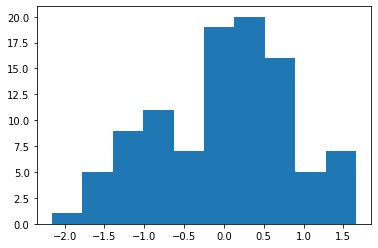

In [18]:
plt.hist(data['y_pred'] - data['y_act'])
plt.show()

### Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m) * (y_i-y_m)) / sum((xi-x_m)^2)
* a = y_m - b * x_m

In [19]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_act'])
x_mean, y_mean

(1.7298453275728678, 16.50891811336413)

In [20]:
data['beta_n'] = (data['x'] - x_mean) * (data['y_act'] - y_mean)
data['beta_d'] = (data['x'] - x_mean)**2

In [21]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [22]:
alpha = y_mean - beta * x_mean

In [23]:
alpha, beta

(11.944918976737789, 2.6383856775391883)

Modelo lineal obtenido por regresión es: y = 11.968324559330153 + 2.564485452904129 * x

In [24]:
data['y_model'] = alpha + beta * data['x']

In [25]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.949480,21.852077,22.268649,33.174495,0.173532,28.549346,11.859862,4.926779,22.365171
1,0.788902,14.335707,14.051145,6.040649,0.080975,4.722847,2.044869,0.885375,14.026346
2,4.760155,24.802369,24.376402,61.897309,0.181448,68.781329,25.131723,9.182775,24.504043
3,2.751641,19.865822,19.154265,6.997863,0.506312,11.268802,3.430068,1.044066,19.204808
4,9.085231,35.830204,35.621599,365.294584,0.043516,373.312092,142.115501,54.101691,35.915261


In [26]:
SSR = sum((data['y_model'] - np.mean(data['y_act']))**2)
SSD = sum((data['y_model'] - data['y_act'])**2)
SST = sum((data['y_act'] - np.mean(data['y_act']))**2)

In [27]:
SSR, SSD, SST

(4175.518604718677, 66.93131856197328, 4242.4499232806465)

In [28]:
R2 = SSR / SST
R2

0.9842234275542816

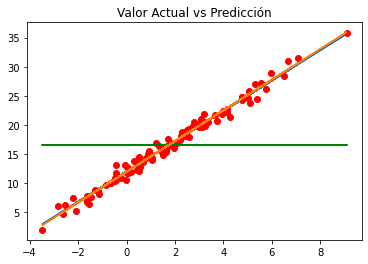

In [29]:
y_mean = [np.mean(data['y_act']) for i in range(1, len(x_list) + 1)]

plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'],data['y_act'], 'ro')
plt.plot(data['x'], y_mean, 'g') # promedio de todas las y
plt.plot(data['x'], data['y_model'])
plt.title('Valor Actual vs Predicción')
plt.show()

### Error estándar de los residuos (RSE)

In [30]:
RSE = np.sqrt(SSD/(len(data) - 2))
RSE

0.8264215863513503

In [31]:
np.mean(data['y_act'])

16.50891811336413

In [32]:
print('El error es del: {}% '.format(round(((RSE / np.mean(data['y_act']))*100), 2)))

El error es del: 5.01% 
